# Neural Networks Made Even Simpler with PyTorch

An ultra-compact neural network using PyTorch's Sequential API. This implementation will highlight the same concepts but with EVEN LESS code than the intermediate class-based example!

By: Zack Malone, Data Scientist / Cloud Data Engineer 

Epoch 0: Loss=0.6806, Train Acc=0.5000, Val Loss=0.6736, Val Acc=0.5000
Epoch 50: Loss=0.2510, Train Acc=0.8925, Val Loss=0.2431, Val Acc=0.9000
Epoch 100: Loss=0.1228, Train Acc=0.9588, Val Loss=0.1049, Val Acc=0.9650
Epoch 150: Loss=0.0695, Train Acc=0.9712, Val Loss=0.0484, Val Acc=0.9850
Epoch 200: Loss=0.0627, Train Acc=0.9750, Val Loss=0.0387, Val Acc=0.9900
Epoch 250: Loss=0.0608, Train Acc=0.9775, Val Loss=0.0369, Val Acc=0.9900


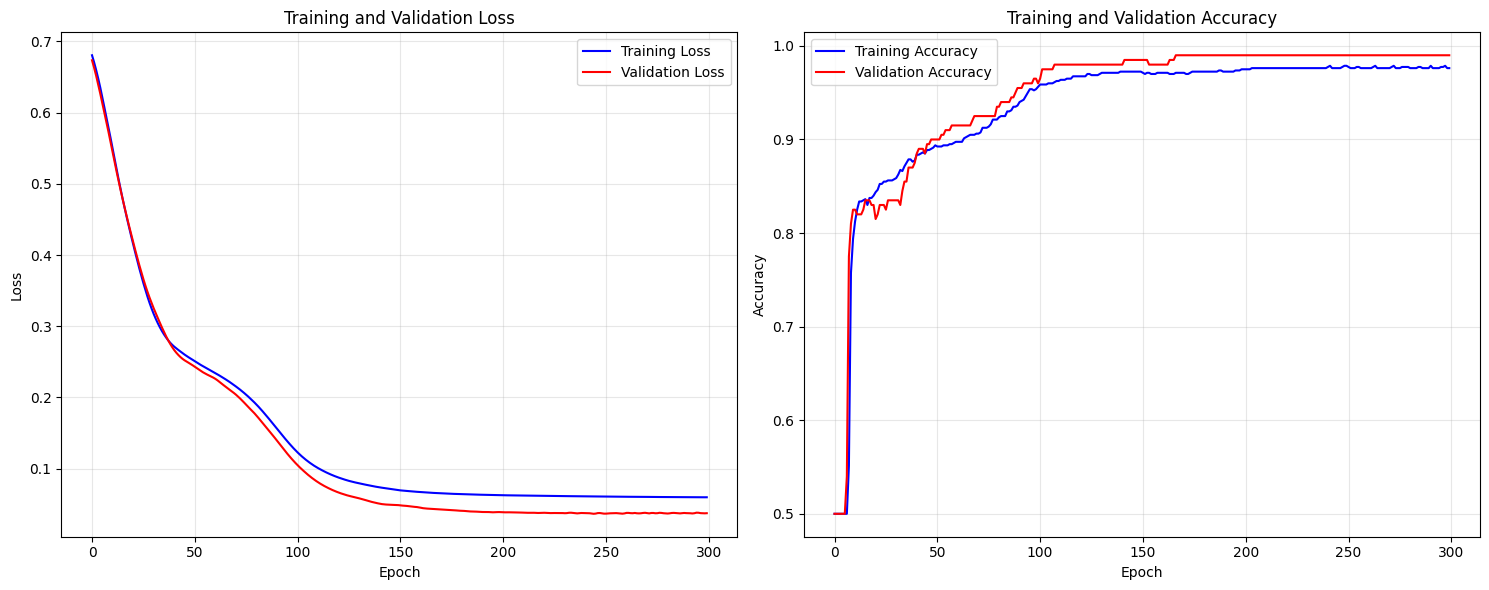

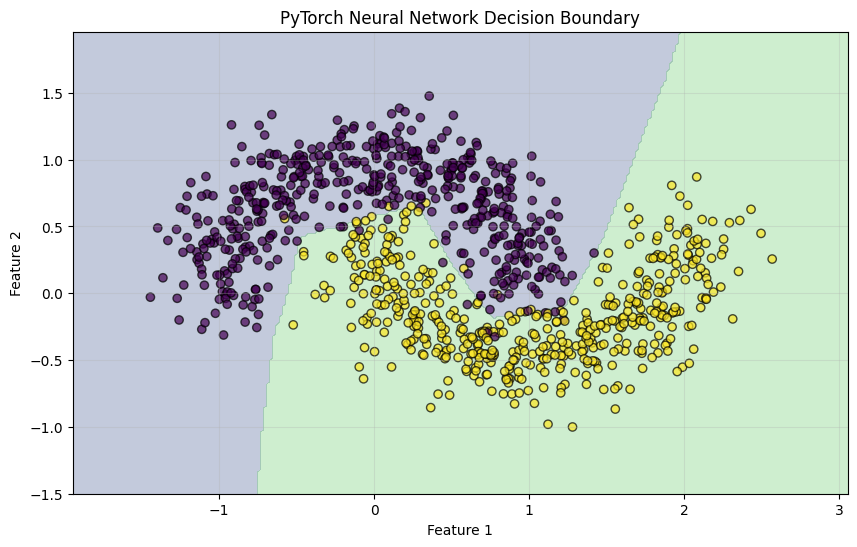

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate the same moon dataset and convert to PyTorch tensors
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Create a neural network in one line using nn.Sequential
model = nn.Sequential(
    nn.Linear(2, 16),  # Input layer (2 features) to first hidden layer (16 neurons)
    nn.ReLU(),         # Activation function
    nn.Linear(16, 8),  # Second hidden layer (8 neurons)
    nn.ReLU(),         # Activation function
    nn.Linear(8, 1),   # Output layer (1 neuron for binary classification)
    nn.Sigmoid()       # Output activation for binary classification
)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Create lists to store metrics for visualization
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
epochs = []

# Train the model 
for epoch in range(300):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Calculate and store metrics
    with torch.no_grad():
        # Training metrics
        train_accuracy = ((outputs > 0.5).float() == y_train_tensor).float().mean()
        
        # Validation metrics
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_accuracy = ((val_outputs > 0.5).float() == y_test_tensor).float().mean()
        
        # Store for plotting
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        train_accuracies.append(train_accuracy.item())
        val_accuracies.append(val_accuracy.item())
        epochs.append(epoch)
    
    # Print progress every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.4f}, Train Acc={train_accuracy:.4f}, Val Loss={val_loss:.4f}, Val Acc={val_accuracy:.4f}")

# Create a figure with two subplots for loss and accuracy
plt.figure(figsize=(15, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize the decision boundary
plt.figure(figsize=(10, 6))
h = 0.02  # Step size
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions
with torch.no_grad():
    grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    Z = model(grid_tensor).numpy() > 0.5
    Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('PyTorch Neural Network Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()


## Key Concepts Illustrated in PyTorch Implementation

1. **Model Creation**:
   - `nn.Sequential` creates an entire neural network in just one line
   - No need to define custom classes or forward methods
   - Each layer and activation are simply added in sequence

2. **Activation Functions**:
   - Available as built-in modules like `nn.ReLU()`, `nn.Tanh()`, `nn.Sigmoid()`
   - No need to implement derivatives - PyTorch handles backpropagation automatically

3. **Forward Propagation**:
   - Calling `model(X_train_tensor)` replaces our entire forward pass matrix calculation
   - Compare to our 30+ lines of code to implement the custom forward method

4. **Loss Functions**:
   - Built-in implementations like `nn.BCELoss()` replace our custom loss functions
   - No need to derive gradients manually

5. **Backpropagation**:
   - Handled by PyTorch's autograd system with just `loss.backward()`
   - No manual derivative calculations or chain rule application needed

6. **Optimizers**:
   - Pre-implemented algorithms like Adam, SGD, and RMSprop
   - Weight updates happen automatically with `optimizer.step()`

7. **Training Loop Simplicity**:
   - Our basic training loop is just 3 core lines: forward pass, loss calculation, and backward/update
   - Compare to the complex nested loops and calculations in our from-scratch implementation

8. **Model Evaluation**:
   - Easy switching between training and evaluation modes with `model.train()` and `model.eval()`
   - The `with torch.no_grad()` context prevents gradient calculation during inference

## Advantages of Using PyTorch

1. **Less Code**: Our PyTorch implementation is significantly shorter and more readable
2. **Automatic Differentiation**: No need to implement backpropagation manually
3. **GPU Acceleration**: Just add `.to('cuda')` to run on GPU (not shown here for simplicity)
4. **Ecosystem Support**: Easy integration with more advanced techniques
5. **Debugging Tools**: Better error messages and debugging capabilities
6. **Performance**: Optimized implementations of core operations

The same concepts we built from scratch (neurons, weights, bias, activation functions, forward/backward propagation) are all present in the PyTorch version, but abstracted away to let you focus on model architecture and hyperparameters rather than implementation details.